In [1]:
import pandas as pd
from src.online_learning.utils import utils
import os

In [2]:
relative_path_ground = os.path.join('..', '..', 'data', 'ground','checkup2-modulo.csv')
path_ground = utils.get_absolute_path(relative_path_ground)

In [3]:
df = pd.read_csv(path_ground, delimiter=';')

In [4]:
df.head()

,Timestamp,Tdiff [s],Voltage(V),Current(A),Temperature,Tamb
0,24/05/24 14:00,101.052,24.816,0.240,27.401,25.782
1,24/05/24 14:00,1.002,24.824,0.080,27.401,25.813
2,24/05/24 14:00,1.001,24.823,0.294,27.339,25.782
3,24/05/24 14:00,1.000,24.822,0.240,27.401,25.751
4,24/05/24 14:00,1.001,24.823,0.240,27.401,25.751


In [5]:
df.at[0, 'Tdiff [s]'] = 0

In [6]:
df.head()

,Timestamp,Tdiff [s],Voltage(V),Current(A),Temperature,Tamb
0,24/05/24 14:00,0.000,24.816,0.240,27.401,25.782
1,24/05/24 14:00,1.002,24.824,0.080,27.401,25.813
2,24/05/24 14:00,1.001,24.823,0.294,27.339,25.782
3,24/05/24 14:00,1.000,24.822,0.240,27.401,25.751
4,24/05/24 14:00,1.001,24.823,0.240,27.401,25.751


In [7]:
# fix data_format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%y %H:%M')
df['Cumulative Tdiff [s]'] = df['Tdiff [s]'].cumsum()
initial_timestamp = df['Timestamp'].iloc[0]
df['Timestamp'] = initial_timestamp + pd.to_timedelta(df['Cumulative Tdiff [s]'], unit='s')
df['Timestamp'] = df['Timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S')
df = df.drop(columns=['Tdiff [s]', 'Cumulative Tdiff [s]'])

In [8]:
df.head()

,Timestamp,Voltage(V),Current(A),Temperature,Tamb
0,2024/05/24 14:00:00,24.816,0.240,27.401,25.782
1,2024/05/24 14:00:01,24.824,0.080,27.401,25.813
2,2024/05/24 14:00:02,24.823,0.294,27.339,25.782
3,2024/05/24 14:00:03,24.822,0.240,27.401,25.751
4,2024/05/24 14:00:04,24.823,0.240,27.401,25.751


In [9]:
df.to_csv(path_ground, index= False)

Plotting

<Axes: >

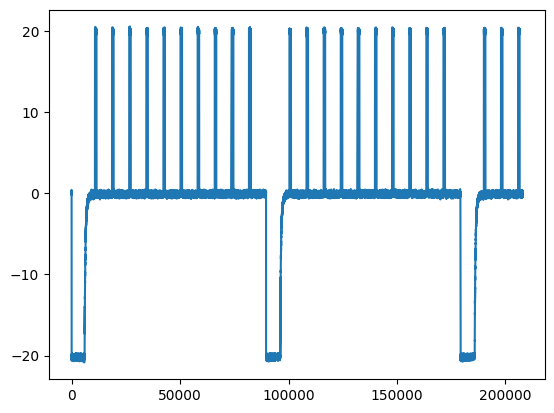

In [22]:
df['Current(A)'].plot()

<Axes: >

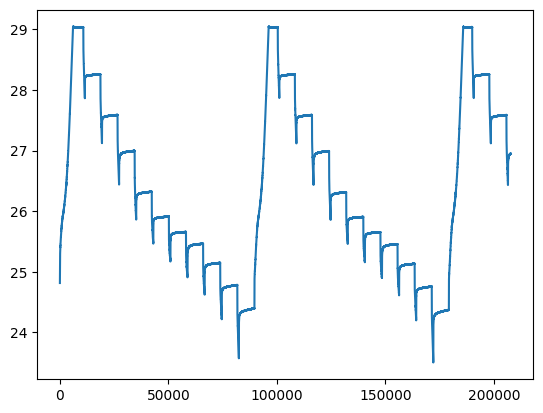

In [23]:
df['Voltage(V)'].plot()

CUT THE LAST AND SAVE THE POINT

In [30]:
tmp = df.iloc[0:90000]

<Axes: >

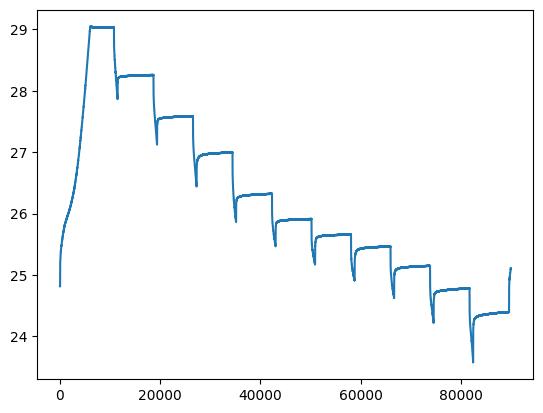

In [31]:
tmp['Voltage(V)'].plot()

In [48]:
def split_dataframe(df, chunk_size):
    
    chunks = []
    indices = []

    for i in range(0, len(df), chunk_size):
        chunk = df.iloc[i:i + chunk_size]
        chunks.append(chunk)
        
        start_idx = df.index[i]
        end_idx = df.index[min(i + chunk_size - 1, len(df) - 1)]
        indices.append((start_idx, end_idx))

    return chunks, indices

In [49]:
dfs_list, indices = split_dataframe(df=df, chunk_size=90000)

In [38]:
print(len(dfs_list))

3


In [41]:
dfs_list[0].describe()

,Tdiff [s],Voltage(V),Current(A),Temperature,Tamb
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,1.005384,26.217873,-0.019626,27.632304,25.798070
std,0.333583,1.345806,7.824837,0.812662,0.485118
min,0.994000,23.574000,-20.855000,26.467000,24.412000
25%,1.001000,25.141000,-0.240000,27.089000,25.440000
50%,1.003000,25.900000,-0.134000,27.401000,25.751000
75%,1.005000,27.171000,0.027000,27.868000,26.125000
max,101.052000,29.049000,20.535000,30.389000,27.588000


In [42]:
dfs_list[1].describe()

,Tdiff [s],Voltage(V),Current(A),Temperature,Tamb
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,1.004219,26.186559,-0.134873,27.456127,25.588871
std,0.007770,1.337192,7.979952,0.912506,0.474127
min,0.996000,23.505000,-20.748000,26.187000,24.350000
25%,1.001000,25.126000,-0.240000,26.903000,25.253000
50%,1.003000,25.892000,-0.080000,27.214000,25.502000
75%,1.005000,26.993000,0.027000,27.588000,25.844000
max,1.222000,29.046000,20.428000,30.638000,27.588000


In [43]:
dfs_list[2].describe()

,Tdiff [s],Voltage(V),Current(A),Temperature,Tamb
count,27802.000000,27802.000000,27802.000000,27802.000000,27802.000000
mean,1.004202,27.774109,-3.034871,28.311964,25.716585
std,0.009365,0.885289,10.441564,0.933832,0.419181
min,0.989000,25.379000,-20.748000,27.058000,24.475000
25%,1.001000,27.530250,-1.522000,27.556000,25.440000
50%,1.003000,27.588000,-0.187000,27.899000,25.720000
75%,1.005000,28.255000,-0.027000,29.051000,25.969000
max,1.842000,29.046000,20.375000,30.482000,27.432000


In [44]:
indices

[(0, 89999), (90000, 179999), (180000, 207801)]

<Axes: >

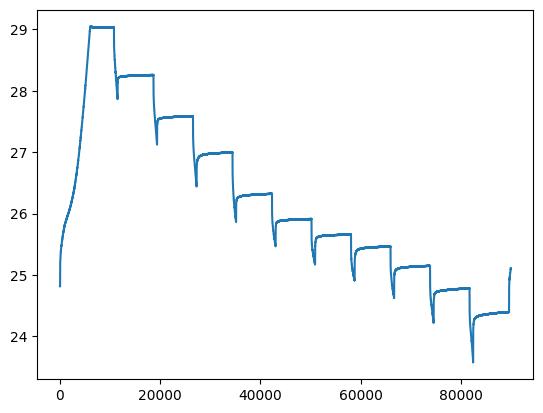

In [45]:
dfs_list[0]['Voltage(V)'].plot()